In [2]:
import pandas
import numpy as np
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [3]:
data_path = "2008.csv"
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8,
		 'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16,
		 'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
		 'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
		 'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
		 'LateAircraftDelay': np.float16, 'DepTime': np.float16}

raw_data = pandas.read_csv(data_path, usecols=dtype.keys(), dtype=dtype)


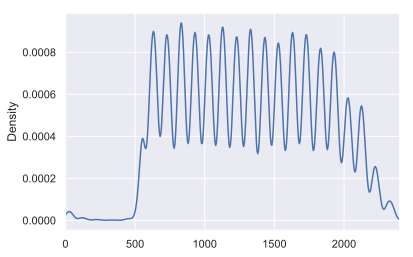

In [12]:
### answer 5
raw_data['DepTime'].plot(kind='density', xlim = (0, 2400))

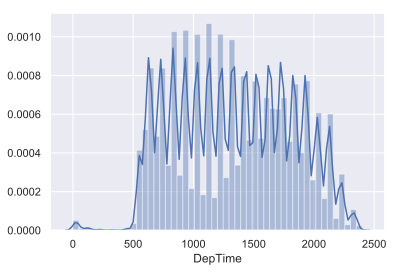

In [11]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

fig_data = raw_data[~raw_data['DepTime'].isna()]
sns.distplot(fig_data['DepTime'])

In [5]:
raw_data['DepTime'].hist(figsize=(10, 4), width = range(0,2400,100))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000188E6EC27B8> (for post_execute):


ValueError: setting an array element with a sequence.

ValueError: setting an array element with a sequence.

<Figure size 720x288 with 1 Axes>

In [ ]:
raw_data['DepTime'].plot(kind='density', xlim = (0, 2400), xticks = range(0,2400,100))